<a href="https://colab.research.google.com/github/davidogm/TalleresULPGC/blob/main/XAI/Student_Success_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import shap

# **Student Performance Factors Dataset**


In [ ]:
df_performance = pd.read_csv("StudentPerformanceFactors.csv")

df_performance.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df_performance.shape

(6607, 20)

In [ ]:
df_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df_performance.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
df_performance.nunique()

,0
Hours_Studied,41
Attendance,41
Parental_Involvement,3
Access_to_Resources,3
Extracurricular_Activities,2
Sleep_Hours,7
Previous_Scores,51
Motivation_Level,3
Internet_Access,2
Tutoring_Sessions,9


### **Null Values Treatment:**

In [ ]:
# Check for missing values in each column
df_performance.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
# Select columns with numeric data type (int64)
numeric_cols = df_performance.select_dtypes(include=['int64']).columns.to_list()
# Select columns with categorical data type (object)
cat_cols = df_performance.select_dtypes(include=['object']).columns.to_list()

print('numeric columns:', numeric_cols)
print('categorical columns:', cat_cols)

numeric columns: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
categorical columns: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


In [ ]:
# Impute missing values in categorical columns (there are no missing values in numeric columns)
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to categorical columns, replacing missing values with the most frequent category
df_performance[cat_cols] = cat_imputer.fit_transform(df_performance[cat_cols])

### **Outliers Detection:**

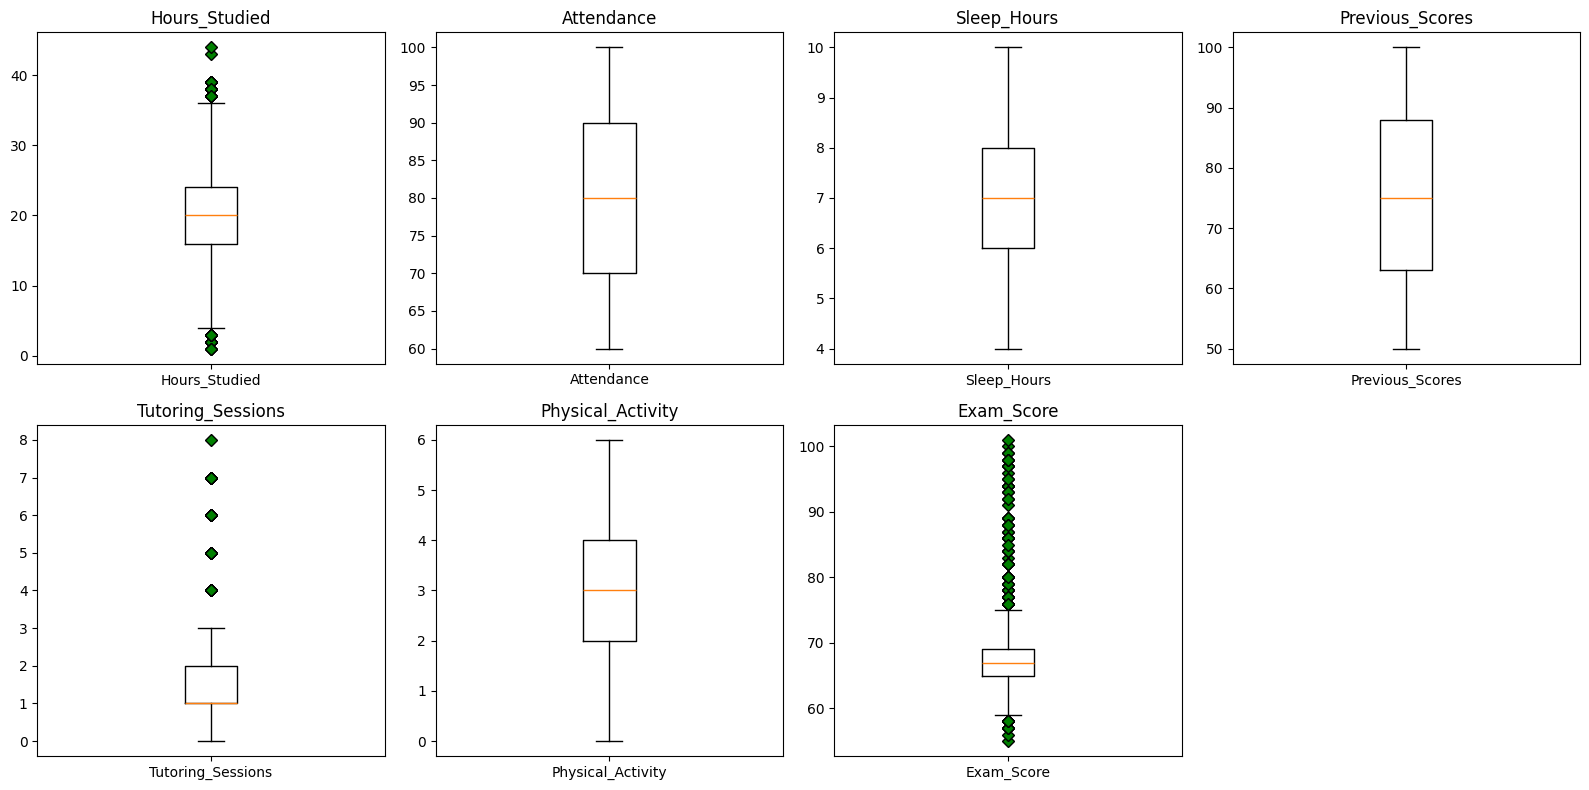

In [ ]:
# Configure boxplots with green diamond outliers and create a 2x4 subplot grid
green_diamond = dict(markerfacecolor='g', marker='D')

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col_name in enumerate(numeric_cols[:7]):
    axes[i].set_title(col_name)
    axes[i].boxplot(df_performance[col_name], flierprops=green_diamond)
    axes[i].set_xticklabels([col_name])

# Remove unused subplot(s)
if len(numeric_cols) < len(axes):
    for j in range(len(numeric_cols), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



### **Distribution of categorical variables**

/tmp/ipython-input-19-3852802197.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


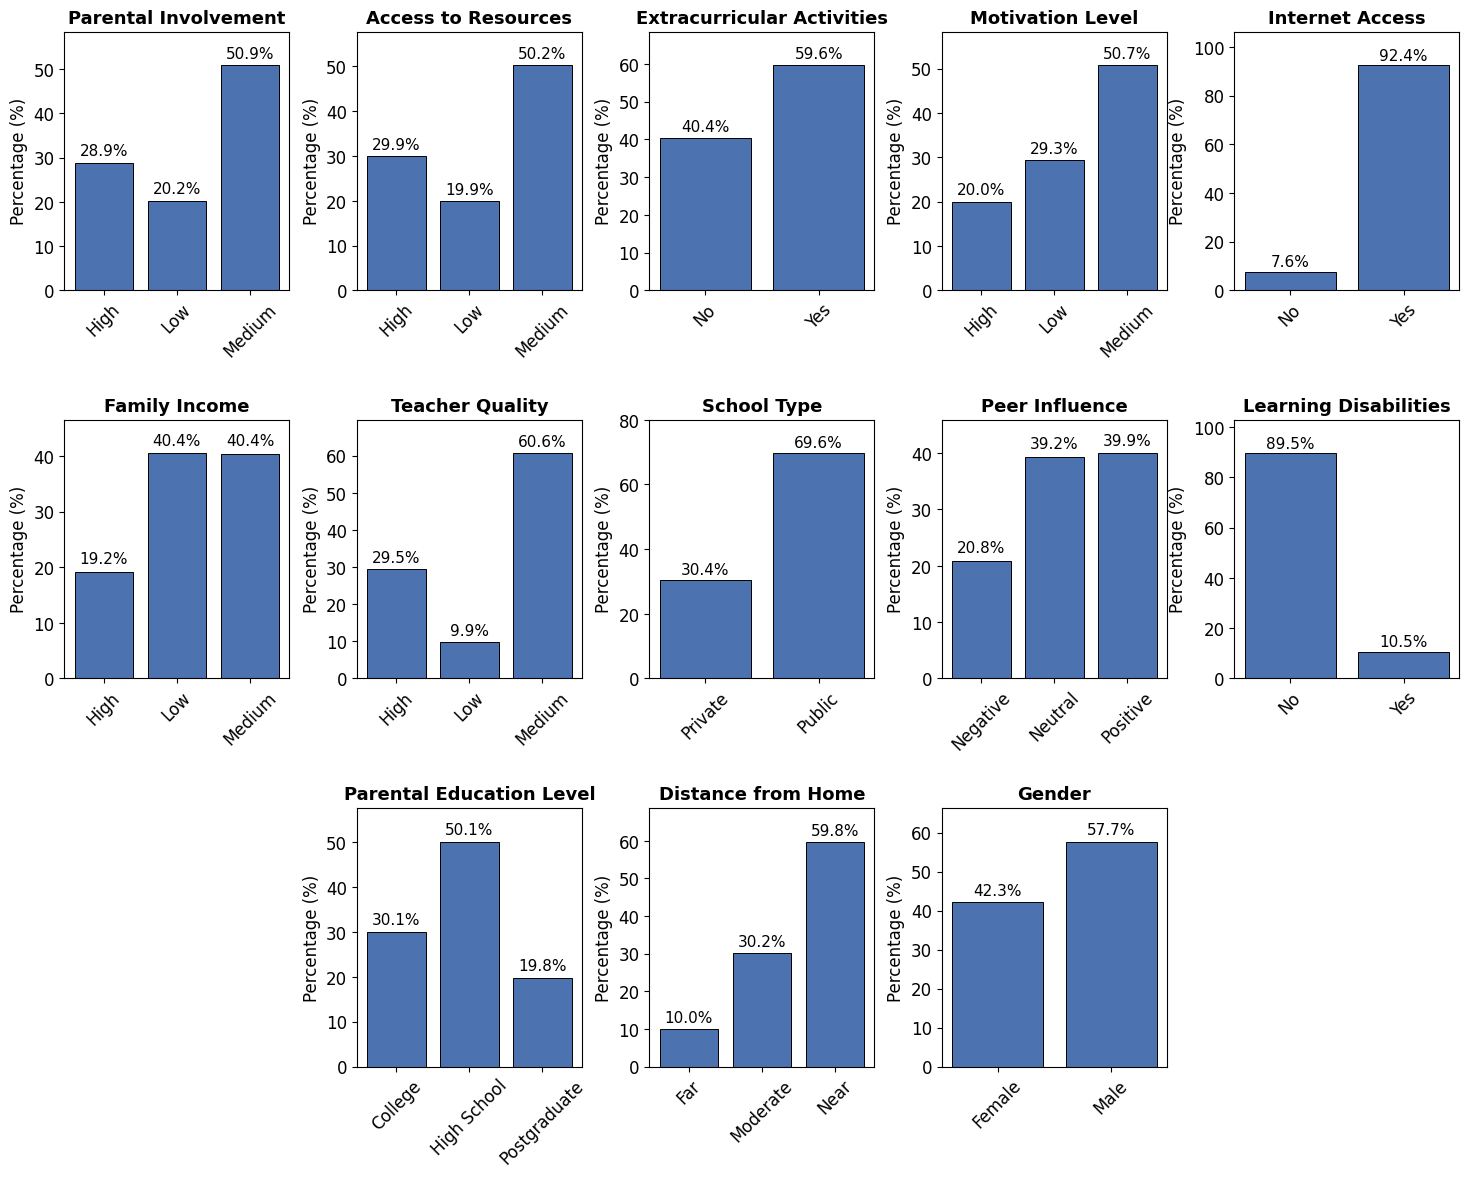

In [ ]:
total = len(cat_cols)
n_rows = 3
n_cols = (total + n_rows - 1) // n_rows
last_row_items = total % n_cols if total % n_cols != 0 else n_cols
start_col = (n_cols - last_row_items) // 2

fig = plt.figure(figsize=(18, 5 * n_rows))
gs = gridspec.GridSpec(n_rows, n_cols, figure=fig, wspace=0.3, hspace=0.5)

axes = []

for i in range(total):
    row = i // n_cols
    col = i % n_cols


    if row == n_rows - 1 and last_row_items != n_cols:
        col += start_col

    ax = fig.add_subplot(gs[row, col])
    axes.append(ax)

    col_name = cat_cols[i]
    proportions = df_performance[col_name].value_counts(normalize=True).sort_index()

    bars = ax.bar(
        proportions.index.astype(str),
        proportions.values * 100,
        color='#4C72B0', edgecolor='black', linewidth=0.7
    )

    ax.set_title(col_name.replace("_", " "), fontsize=13, fontweight='bold')
    ax.set_ylabel('Percentage (%)', fontsize=12)
    ax.tick_params(axis='x', labelrotation=45, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_ylim(top=max(proportions.values * 100) * 1.15)


    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 1,
            f'{height:.1f}%',
            ha='center',
            va='bottom',
            fontsize=11
        )

plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()

### **Categorical variables encoding**

In [ ]:
# Make a copy of the original DataFrame for encoding
df_performance_encoded = df_performance.copy()

# Define custom order for ordinal categorical variables
ordinal_categories = {
    'Parental_Involvement': ['Low', 'Medium', 'High'],
    'Access_to_Resources': ['Low', 'Medium', 'High'],
    'Motivation_Level': ['Low', 'Medium', 'High'],
    'Family_Income': ['Low', 'Medium', 'High'],
    'Teacher_Quality': ['Low', 'Medium', 'High'],
    'Parental_Education_Level': ['High School', 'College', 'Postgraduate'],
    'Distance_from_Home': ['Near', 'Moderate', 'Far'],
    'Peer_Influence': ['Negative', 'Neutral', 'Positive']
}

# Binary categorical variables (nominal)
binary_categories = {
    'School_Type': ['Public', 'Private'],
    'Extracurricular_Activities': ['No', 'Yes'],
    'Internet_Access': ['No', 'Yes'],
    'Learning_Disabilities': ['No', 'Yes'],
    'Gender': ['Female', 'Male']
}

# --- Encode ordinal variables with defined category order ---
ordinal_cols = list(ordinal_categories.keys())
ordinal_values = [ordinal_categories[col] for col in ordinal_cols]

ordinal_encoder = OrdinalEncoder(categories=ordinal_values)
df_performance_encoded[ordinal_cols] = ordinal_encoder.fit_transform(df_performance_encoded[ordinal_cols])
df_performance_encoded[ordinal_cols] = df_performance_encoded[ordinal_cols].astype(int)

# Display the ordinal encoding mapping used
print("Ordinal variables encoding:")
for col, cats in zip(ordinal_cols, ordinal_encoder.categories_):
    mapping = {cat: idx for idx, cat in enumerate(cats)}
    print(f"{col}: {mapping}")

# --- Encode binary variables using LabelEncoder ---
label_encoder = LabelEncoder()

print("\nBinary variables encoding:")
for col in binary_categories.keys():
    df_performance_encoded[col] = label_encoder.fit_transform(df_performance_encoded[col])
    mapping = {cat: idx for idx, cat in enumerate(label_encoder.classes_)}
    print(f"{col}: {mapping}")

# --- Final summary of the encoded DataFrame ---
print("\nSummary of encoded DataFrame:")
df_performance_encoded.info()


Ordinal variables encoding:
Parental_Involvement: {'Low': 0, 'Medium': 1, 'High': 2}
Access_to_Resources: {'Low': 0, 'Medium': 1, 'High': 2}
Motivation_Level: {'Low': 0, 'Medium': 1, 'High': 2}
Family_Income: {'Low': 0, 'Medium': 1, 'High': 2}
Teacher_Quality: {'Low': 0, 'Medium': 1, 'High': 2}
Parental_Education_Level: {'High School': 0, 'College': 1, 'Postgraduate': 2}
Distance_from_Home: {'Near': 0, 'Moderate': 1, 'Far': 2}
Peer_Influence: {'Negative': 0, 'Neutral': 1, 'Positive': 2}

Binary variables encoding:
School_Type: {'Private': 0, 'Public': 1}
Extracurricular_Activities: {'No': 0, 'Yes': 1}
Internet_Access: {'No': 0, 'Yes': 1}
Learning_Disabilities: {'No': 0, 'Yes': 1}
Gender: {'Female': 0, 'Male': 1}

Summary of encoded DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied            

### **Correlation Matrix**

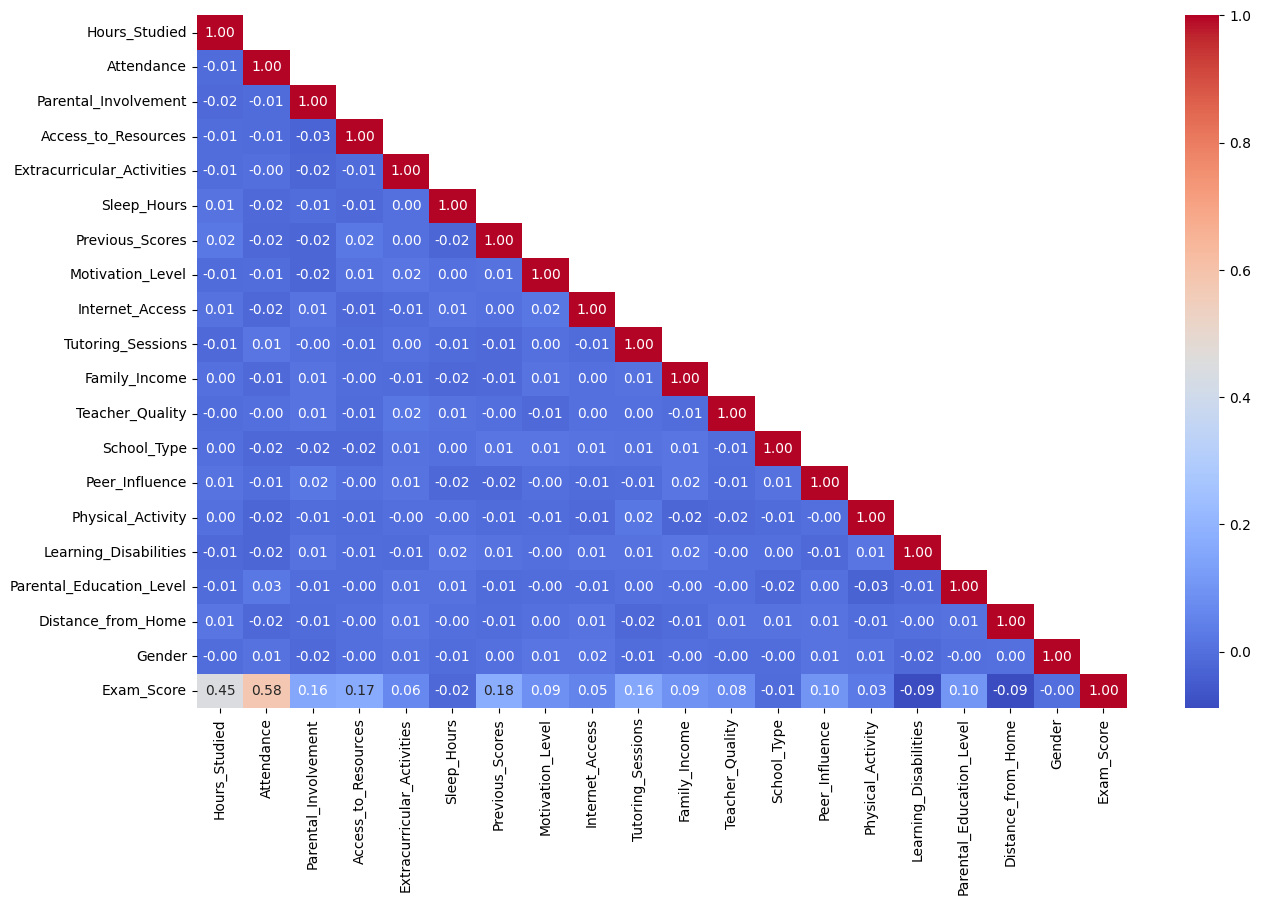

In [ ]:
# Compute the correlation matrix for the encoded DataFrame
corr_matrix = df_performance_encoded.corr()

# Create a mask for the upper triangle to avoid duplicate correlation values
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Plot the heatmap of correlations with annotations and a coolwarm color map
plt.figure(figsize=(15, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, fmt=".2f")
plt.show()

### **Data Preparation and Model Training**


In [ ]:
X = df_performance_encoded.drop(columns='Exam_Score')
y = df_performance_encoded['Exam_Score']

In [ ]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# LightGBM
lgb = LGBMRegressor(random_state=42)
lgb.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 5285, number of used features: 19
[LightGBM] [Info] Start training from score 67.215137


LGBMRegressor(random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
print(f'Precisión: {model.score(X_test, y_test):.2f}')

Precisión: 0.18


IndexError: list index out of range

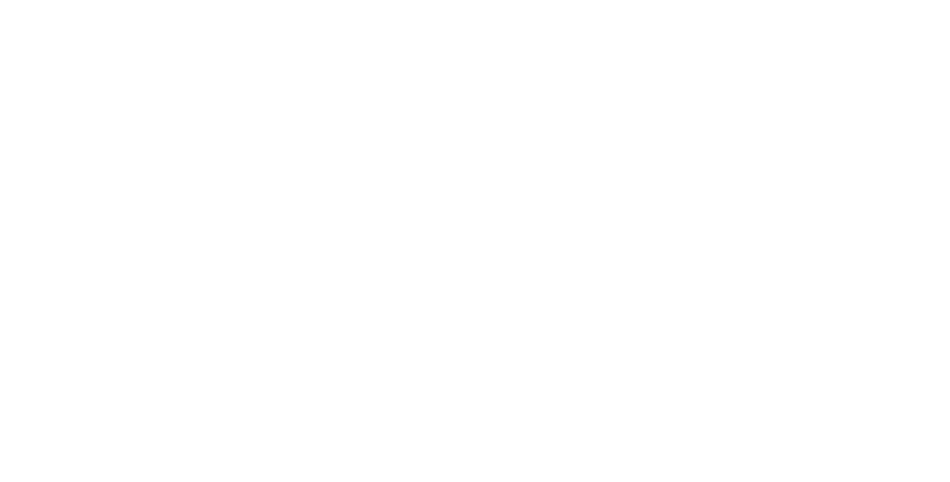

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, class_names=['Exam_Score', 'Pass'], filled=True)
plt.show()

### **Model Performance**

In [ ]:
def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    return {"RMSE": rmse, "MAE": mae, "R2": r2}, preds


results = {}
predictions = {}

results["Random Forest"], predictions["Random Forest"] = evaluate(rf, X_test, y_test)
results["XGBoost"], predictions["XGBoost"] = evaluate(xgb, X_test, y_test)
results["LightGBM"], predictions["LightGBM"] = evaluate(lgb, X_test, y_test)

pd.DataFrame(results).T.round(3)

,RMSE,MAE,R2
Random Forest,2.175,1.084,0.665
XGBoost,2.226,0.986,0.649
LightGBM,1.957,0.804,0.729


Actual vs Predicted Exam Scores Scatter Plot

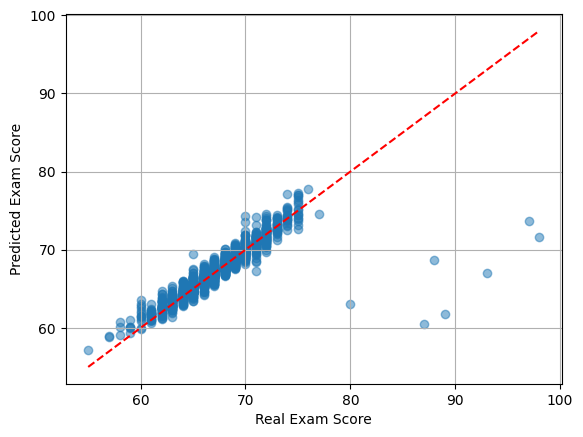

In [ ]:
plt.scatter(y_test, predictions["LightGBM"], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Real Exam Score")
plt.ylabel("Predicted Exam Score")
plt.grid(True)
plt.show()

Distribution of Training Exam Scores

(55.0, 105.0)

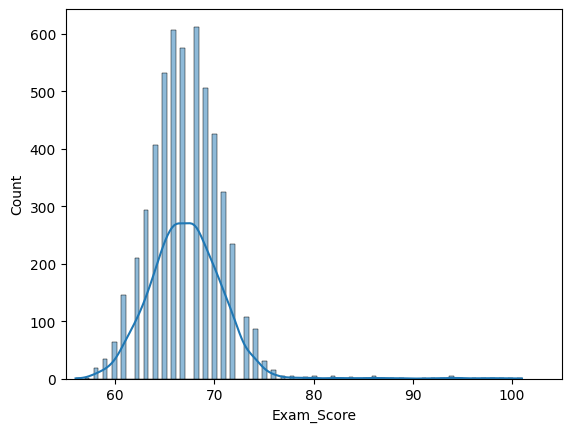

In [ ]:
sns.histplot(y_train, kde=True)
plt.xlim(55, 105)

Distribution of Predicted Exam Scores

(55.0, 105.0)

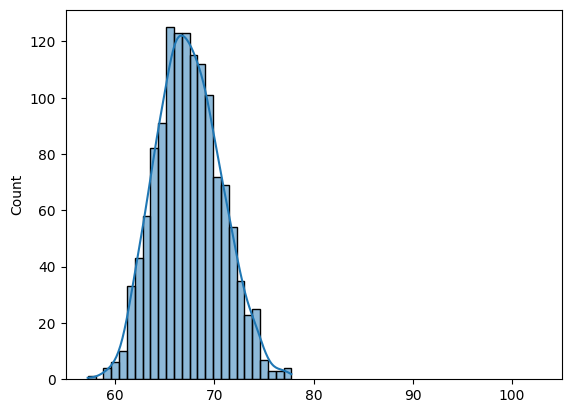

In [ ]:
sns.histplot(predictions["LightGBM"], kde=True)
plt.xlim(55, 105)

### **LightGBM Explainability**

Global Explainability

 98%|===================| 1301/1322 [00:13<00:00]       

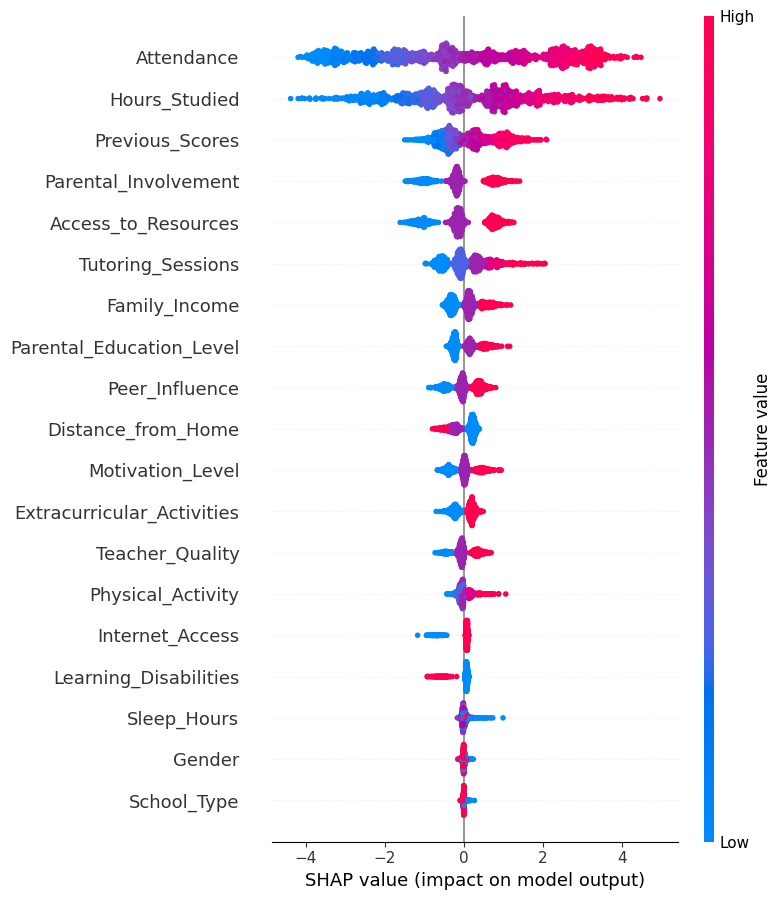

In [ ]:
# Create SHAP explainer using the LightGBM model (chosen for best performance)
explainer = shap.Explainer(lgb, X_train)

# Calculate SHAP values for the test dataset
shap_values = explainer(X_test)

# Generate a global summary plot showing feature importance
shap.summary_plot(shap_values, X_test)

Local Explainability

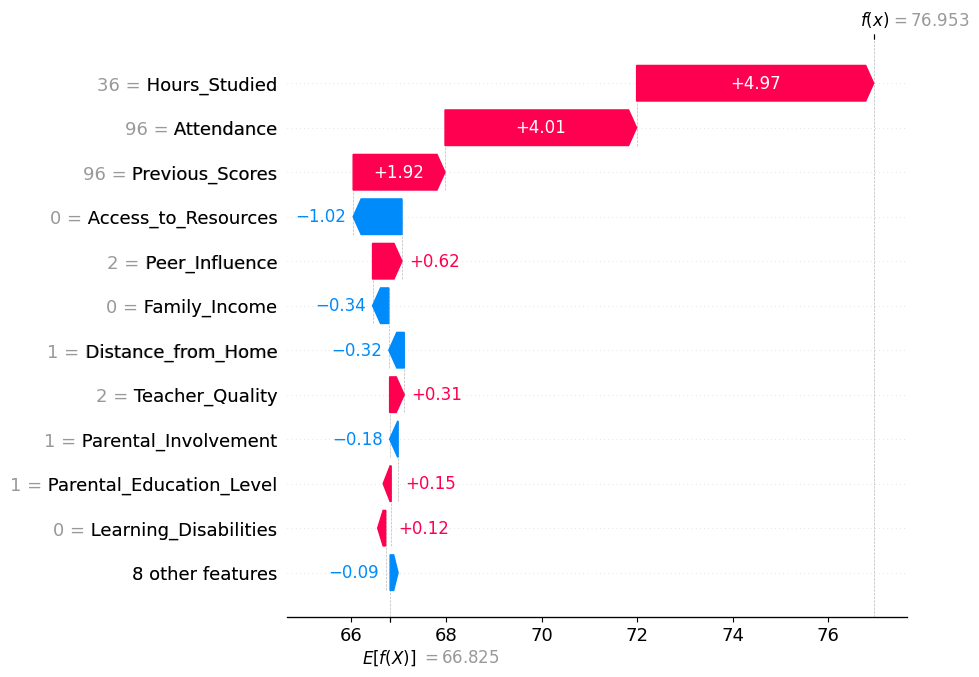

In [ ]:
# Select a specific instance from the test set
i = 213
instance = X_test.iloc[i]

# Get SHAP values for the selected instance
shap_values_instance = shap_values[i]

# Create a waterfall plot to explain the instance prediction
shap.plots.waterfall(shap_values_instance, max_display=12)